In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd



In [70]:
#исходные данные для основного заряда
delta = 1762
omega = 920.104
a_ = 0.3
c_ = 0.05
l_zar=2778.210*1e-3
a=a_*l_zar

D = 0.624 #диаметр камеры сгорания
c=c_*D

e_d=0.727
z_0 = e_d*D/2 #e_0 для основного заряда
e_0=z_0
n = 4
d = (1-e_d)*D

In [71]:
# Исходные данные
p_ref_t=98066.5
p_ref_B=1e5
p_h=1e5
p_nom_0=9.96*1e6

T_0=223.15 #-50
T_s=750
T_ref=293.15

c_p_nach=1004.5
R_nach=287

rho_B=1850
T_p_0=2543.3

mu_g=0.6193*1e-4
lamda_g=0.0871

u_1_B=16.9*1e-3
nu_B=0.22
D_t_B=0.0028

c_p_0= 1314

z_0_Bospl=0.55634 # конденсированная фаза при горении вопсламенителя - из Терры
R_Bospl=317.47 #газовая постоянная продуктов сгорания воспламенителя - из Терры
R_0=R_Bospl*(1-z_0_Bospl)


z_0_Topl=0.1827 # конденсированная фаза при горении основного заряда - из Терры
R_Topl=366.6 #газовая постоянная продуктов сгорания основного заряда - из Терры
R_1=R_Topl*(1-z_0_Topl)

T_p_1=3318.9
n_t=1.17 #показатель политропы топлива

#параметры закона горения
u_1_t=4.52*1e-3
nu_t=0.4
D_t_t=0.0015

c_p_1= 1883

c_t, lamda_t, rho_t= 1377, 0.24, delta

kappa_ref=100
ISX_dan={
    'delta':delta,
    'omega':omega,
    'a_':a_,
    'l_zar':l_zar,
    'c_':c_,
    'D':D,
    'e_d':e_d,
    'n':n,
    'p_ref_t':p_ref_t,
    'p_ref_B':p_ref_B,
    'p_h':p_h,
    'p_nom_0':p_nom_0,
    'T_0':T_0,
    'T_s':T_s,
    'T_ref':T_ref,
    'c_p_nach':c_p_nach,
    'R_nach':R_nach,
    'rho_B':rho_B,
    'T_p_0':T_p_0,
    'mu_g':mu_g,
    'lamda_g':lamda_g,
    'u_1_B':u_1_B,
    'nu_B':nu_B,
    'D_t_B':D_t_B,
    'c_p_0':c_p_0,
    'z_0_Bospl':z_0_Bospl,
    'R_Bospl':R_Bospl,
    'z_0_Topl':z_0_Topl,
    'R_Topl':R_Topl,
    'T_p_1':T_p_1,
    'n_t':n_t,
    'u_1_t':u_1_t,
    'nu_t':nu_t,
    'D_t_t':D_t_t,
    'c_p_1':c_p_1,
    'c_t':c_t,
    'lamda_t':lamda_t,
    'kappa_ref':kappa_ref
}

In [72]:
class PZ():
    def __init__(self, INIT):
        self.N=INIT['N']
        self.e_B_0=INIT['e_B_0']
        self.delta=INIT['delta']
        self.omega=INIT['omega']
        self.a_ =INIT['a_']
        self.l_zar=INIT['l_zar']
        
        self.a=self.a_*self.l_zar
        
        self.c_=INIT['c_']
        self.D=INIT['D']
        
        self.c=self.c_*self.D
        
        self.e_d=INIT['e_d']
        self.z_0 = self.e_d*self.D/2
        self.e_0=self.z_0
        self.d = (1-self.e_d)*self.D
        
        self.n=INIT['n']
        self.p_ref_t=INIT['p_ref_t']
        self.p_ref_B=INIT['p_ref_B']
        self.p_h=INIT['p_h']
        self.p_nom_0=INIT['p_nom_0']
        self.T_0=INIT['T_0']
        self.T_s=INIT['T_s']
        self.T_ref=INIT['T_ref']
        self.c_p_nach=INIT['c_p_nach']
        self.R_nach=INIT['R_nach']
        self.rho_B=INIT['rho_B']
        self.T_p_0=INIT['T_p_0']
        self.mu_g=INIT['mu_g']
        self.lamda_g=INIT['lamda_g']
        self.u_1_B=INIT['u_1_B']
        self.nu_B=INIT['nu_B']
        self.D_t_B=INIT['D_t_B']
        self.c_p_0=INIT['c_p_0']
        self.z_0_Bospl=INIT['z_0_Bospl']
        self.R_Bospl=INIT['R_Bospl']
        
        self.R_0=self.R_Bospl*(1-self.z_0_Bospl)
        
        self.z_0_Topl=INIT['z_0_Topl']
        self.R_Topl=INIT['R_Topl']
        
        self.R_1=self.R_Topl*(1-self.z_0_Topl)
        
        self.T_p_1=INIT['T_p_1']
        self.n_t=INIT['n_t']
        self.u_1_t=INIT['u_1_t']
        self.nu_t=INIT['nu_t']
        self.D_t_t=INIT['D_t_t']
        self.c_p_1=INIT['c_p_1']
        self.c_t=INIT['c_t']
        self.lamda_t=INIT['lamda_t']
        self.kappa_ref=INIT['kappa_ref']
        
        self.rho_t=self.delta
        
        #предварительные вычисления
        self.A_n=(self.n_t*(2/(self.n_t+1))**((self.n_t+1)/(self.n_t-1)))**0.5
        self.S_g_sr=self.omega/(self.rho_t*self.e_0)
        self.F_sv=np.pi*self.d**2/4

        self.etta_T_s=(self.T_s-self.T_0)**2
        
        # для щелевого заряда
        self.beta = np.pi/self.n
        self.F = np.pi*(self.D**2)/4
        self.d_ = self.d/self.D

        self.epsilon_f = 1 - self.d_**2
        self.f_cut = (self.n/math.pi) * (self.c_*np.sqrt(1 - c_**2) - 
                self.c_*np.sqrt(self.d_**2 -self.c_**2) + np.arcsin(c_) - 
                self.d_**2 * np.arcsin(self.c_/self.d_))
        self.epsilon_w = self.epsilon_f -self.a_*self.f_cut
        self.F_cut = self.F*self.f_cut
        self.z_1 = 0.5*(self.d*np.sin(self.beta)-self.c)/(1-np.sin(self.beta))
        self.z_2 = (self.D*np.sin(self.beta)-self.c)/2
        #длина заряда
        self.l_gr=self.omega/(self.delta * self.epsilon_w * self.F)
        
        
        # перерасчёт номинального давления в зависимости от начальной температуры и параметра Победоносцева
        self.p_nom=self.p_nom_0*np.exp((self.D_t_t*(self.T_0-self.T_ref))/(1-self.nu_t))
        #*(FI_kappa(Kappa(S_g_t(0),F_sv)))**(1/(1-nu_t))
        self.F_kr=(self.S_g_sr*
                   self.u_1_t*(self.p_nom/self.p_ref_t)**self.nu_t*np.exp(self.D_t_t*(self.T_0-self.T_ref))*
                   self.rho_t*(self.R_1*self.T_p_1)**0.5)/(self.A_n*self.p_nom)

        #Начальные условия
        self.W_0=np.pi*self.D**3/12+np.pi*self.D**2/4*self.l_gr-self.omega/self.rho_t
        self.INIT_1=np.array([self.p_h, self.T_0 , self.W_0, self.c_p_nach, self.R_nach,0,0,0])
        self.INIT_2=[]
    def S_g_B(self,e, e_B_0):
        e0 = e_B_0
        d = e_B_0*5
        #d = 0.21 * 1e-3
        c = e_B_0*0.8
        h  = e0 - c/2
        def R(d, h, e0):
            r = d/2
            return (r**2 + h**2)/2/h
        def S1(e, e0):
            r = d/2
            return 4*np.pi*(R(d, h, e0)-e)*h1(e, e0) + 2*np.pi*(r - e)*c1(e, e0)
        def h1(e, e0):
            r = d/2
            return (R(d, h, e0) - e) - np.sqrt((R(d, h, e0) - e)**2 - (r - e)**2)
        def c1(e, e0):
            return 2*(e0 - e - h1(e, e0))
        def S2(e, e0):
            return 4*np.pi*(R(d, h, e0) - e)*(e0 - e)
        def e1(e, e0):
            r = d/2
            return ((R(d, h, e0)**2 - r**2) - (R(d, h, e0) - e0)**2)/(2*(R(d, h, e0) - r))
        ee = e1(e, e0)
        def WW(e, e0):
            r = d/2
            return np.pi*r**2*c + 2*np.pi*h**2*(R(d, h, e0) - h/3)
        self.W_tablet = WW(e, e0)
        global W_tab
        W_tab=self.W_tablet
        if e < ee:
            return S1(e, e0)
        else:
            return S2(e, e0)
    def X(self,G_B,T,G_t,dQ_t_dt,F_q_1_):
        x=G_B*self.c_p_0*(self.T_p_0-T)+G_t*self.c_p_1*(self.T_p_1-T)-dQ_t_dt*F_q_1_
        return x
    def Y(self,G_B,T,G_t,p,rho,G):
        y= G_B*self.R_0*T+G_t*self.R_1*T-p/rho*G-p*(G_B/self.rho_B + G_t/self.rho_t)
        return y

    #закон горения
    def U_t(self,p):
        return self.u_1_t*(p/self.p_ref_t)**self.nu_t*np.exp(self.D_t_t*(self.T_0-self.T_ref))
    def U_B(self,p):
        return self.u_1_B*(p/self.p_ref_B)**self.nu_B*np.exp(self.D_t_B*(self.T_0-self.T_ref))

    def FI_kappa(self,kappa):
        return 1
    #return max(1, 1+0.003*(kappa-kappa_ref))
    def Kappa(self,S_g_0, F_sv): #параметр Победоносцева
        return S_g_0/F_sv
     
    def F_q_1(self,etta_t):
        if etta_t < self.etta_T_s:
            return 1
        else:
            return 0
    def F_0(self,e):
        if e <= self.e_B_0:
            return 1
        else:
            return 0
    def F_1(self,etta_T, e):
        if etta_T >= self.etta_T_s and e <= self.e_0:
            return 1
        else:
            return 0

    #расчёт теплового потока
    def q(self,etta_T, G_B, T):
        Pr=(self.c_p_0*self.mu_g)/self.lamda_g
        rho_v=G_B/self.F_sv
        Re=(rho_v*self.d)/self.mu_g
        Nu=0.023*Re**0.8*Pr*0.4
        alpha=Nu*self.lamda_g/self.d
        return alpha*(T-(self.T_0+etta_T**0.5))
    def Pi(lamda, k):
        return (1 - (k-1)/(k+1)*lamda**2)**(k/(k-1))

    def G_(self,p,R,T, k):    #расход через сопло
        if p*PZ.Pi(1,k) < self.p_h:
            return ((p*self.F_kr)/(np.sqrt(R*T)))*(self.p_h/p)**(1/self.n_t)*np.sqrt(2*self.n_t/(self.n_t-1)*np.abs(1-(self.p_h/p)**((self.n_t-1)/self.n_t)))
        else:
            return (self.A_n*self.F_kr*p)/((R*T)**0.5)
    def G_b(self,S,u, F_0): #расход от воспламенителя
        return S*u*self.rho_B*F_0
    def G_topl(self,S,u,fi_kappa, f_1):#расход от основного заряда
        return S*u*self.rho_t*f_1*fi_kappa    
         
    def S_g_t(self,z): #зависимость площади поверхности горения основного заряда
        def e_1(d, beta, c):
            return 0.5*((d*np.sin(beta) - c)/(1 - np.sin(beta)))

        def e_2(D, beta, c):
            return 0.5*(D*np.sin(beta) - c)

        def S_a(z):
            if np.pi*(d + 2*z)*(self.l_gr - self.a - z):
                return np.pi*(self.d + 2*z)*(self.l_gr - self.a - z)
            else:
                return 0

        def S_b(z):
            if z > self.z_1:
                return 0
            else:
                return self.n*(self.beta - fi_1(z))*(self.d + 2*z)*self.a 

        def fi_1(z):
            return np.arcsin((self.c + 2*z)/(self.d + 2*z))

        def S_c(z):
            if z >= 0 and z <= self.z_1:
                return 2*self.n*self.a*b1(z)
            elif self.z_1 < z and z <= self.z_2:
                return 2*self.n*self.a*b2(z)
            elif z > self.z_2:
                return 0
            else:
                return 0 ### ???

        def b1(z):
            return 0.5*(np.sqrt(self.D**2 - (self.c + 2*z)**2) -
                        np.sqrt((self.d + 2*z)**2 - (self.c + 2*z)**2))

        def b2(z):
            return 0.5*(np.sqrt(self.D**2 - (self.c + z*2)**2)-
                        (self.c + 2*z)*np.tan(self.beta)**(-1))

        def S_d(z):
            if np.pi/4*(self.D**2 - (self.d + 2*z)**2):
                return np.pi/4*(self.D**2 - (self.d + 2*z)**2)
            else:
                return 0

        def S(z):
            return S_a(z) + S_b(z) + S_c(z) + S_d(z)

        e1 = e_1(self.d,self.beta, self.c)
        e2 = e_2(self.D, self.beta, self.c)

        return S(z)
    def System(self,t, y):
        p,T,W,c_p,R,e_B,e,etta_T=y
        k=c_p/(c_p-R)
        rho=p/(R*T)
        f_q_1=PZ.F_q_1(self,etta_T)
        f_0=PZ.F_0(self,e_B)
        f_1=PZ.F_1(self,etta_T,e)
        S_0=PZ.S_g_t(self,0)

        u_B=PZ.U_B(self,p)
        u=PZ.U_t(self,p)
        S_B=self.N*PZ.S_g_B(self,e_B,self.e_B_0)
        S_t=PZ.S_g_t(self,e)
        d_kan_=self.d+2*e
        F_kan=np.pi*d_kan_**2/4
        kappa=PZ.Kappa(self,S_t, F_kan)
        fi_kappa=PZ.FI_kappa(self,kappa)

        G_B=PZ.G_b(self,self.N*PZ.S_g_B(self,e_B,self.e_B_0),u_B, f_0)
        G_t=PZ.G_topl(self,PZ.S_g_t(self,e),u,fi_kappa, f_1)
        G=PZ.G_(self,p,R,T,k)

        q_1=PZ.q(self,etta_T, G_B, T)
        dQ_t_dt=q_1*S_0


        x=PZ.X(self,G_B,T,G_t,dQ_t_dt,f_q_1)
        y_=PZ.Y(self,G_B,T,G_t,p,rho,G)

        dp_dt=(k-1)/W*(x+y_*k/(k-1))
        dT_dt=(k - 1)/(rho*W*R)*(x+y_)
        dW_dt=G_B/rho_B+G_t/rho_t
        dc_p_dt=1/(rho*W)*(G_B*(c_p_0-c_p)+G_t*(c_p_1-c_p))
        dR_dt=1/(rho*W)*(G_B*(R_0-R)+G_t*(R_1-R))
        de_b_dt=u_B*f_0
        de_dt=u*fi_kappa*f_1
        detta_T_dt=(2*q_1**2)/(c_t*lamda_t*rho_t)*f_q_1

        return np.array([dp_dt,dT_dt,dW_dt, dc_p_dt ,dR_dt, de_b_dt, de_dt, detta_T_dt])
    
    def rk4(self,init, sys, t0, dt, n, stop):
    
        # declaration

        t = np.zeros(n)
        m = len(init) + 1
        res = np.zeros((n, m))

        # initialization

        i = 0
        X = init
        t[i] = t0
        res[i, 0] = t[i]
        res[i, 1:m] = X

        # main loop
        #while stop(t[i], X) > 0 and i < n - 1:
        while i < n - 1:
            k1 = sys(self,t[i], X)
            k2 = sys(self,t[i] + 0.5*dt, X + k1*0.5*dt)
            k3 = sys(self,t[i] + 0.5*dt, X + k2*0.5*dt)
            k4 = sys(self,t[i] + dt, X + k3*dt)
            i += 1
            X += (k1 + 2*k2 + 2*k3 + k4)*dt/6
            t[i] = t[i - 1] + dt
            res[i, 0] = t[i]
            res[i, 1:m] = X

        return res[0:i + 1, :]
    
    def get_res(self):
        global INIT_2 #!!!!
        t_k_1=0.25
        #с шагом
        d_t_1=5*1e-5
        print(self.INIT_1)
        Res=PZ.rk4(self,self.INIT_1, PZ.System, 0, d_t_1, int(t_k_1/d_t_1),stop =1)
        e_topl=Res[:,7]
        p_kam=Res[:,1]
        e_vospl=Res[:,6]
        t_kam=Res[:,0]
        T_kam=Res[:,2]
        c_p_kam=Res[:,4]
        INIT_2=Res[-1][1:] #!!!!
        return np.array([t_kam, p_kam, T_kam])
    def get_res_2(self):
        t_k_1=0.25
        t_k_2=20
        #с шагом
        d_t_2=5*1e-3
        print(INIT_2)
        Res=PZ.rk4(self,INIT_2, PZ.System, t_k_1, d_t_2, int((t_k_2-t_k_1)/d_t_2)+1,stop =1)
        e_topl=Res[:,7]
        p_kam=Res[:,1]
        e_vospl=Res[:,6]
        t_kam=Res[:,0]
        T_kam=Res[:,2]
        return np.array([t_kam, p_kam, T_kam])

In [73]:

ISX_dan['N']=6800
ISX_dan['e_B_0']=0.0018
ISX_dan['T_0']=223.15
result_m50=PZ(ISX_dan).get_res()
result_m50_2=PZ(ISX_dan).get_res_2()

ISX_dan['T_0']=323.15
result_50=PZ(ISX_dan).get_res()
result_50_2=PZ(ISX_dan).get_res_2()

ISX_dan['T_0']=293.15
result_20=PZ(ISX_dan).get_res()
result_20_2=PZ(ISX_dan).get_res_2()

[1.00000000e+05 2.23150000e+02 1.23144157e-01 1.00450000e+03
 2.87000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[1.08354045e+07 3.31871646e+03 1.40171496e-01 1.88299999e+03
 2.99622179e+02 1.80076806e-03 5.87610287e-03 2.77602061e+05]


<ipython-input-72-cc68bbeae723>:141: RuntimeWarning: invalid value encountered in double_scalars
  return self.u_1_B*(p/self.p_ref_B)**self.nu_B*np.exp(self.D_t_B*(self.T_0-self.T_ref))
<ipython-input-72-cc68bbeae723>:139: RuntimeWarning: invalid value encountered in double_scalars
  return self.u_1_t*(p/self.p_ref_t)**self.nu_t*np.exp(self.D_t_t*(self.T_0-self.T_ref))
<ipython-input-72-cc68bbeae723>:178: RuntimeWarning: invalid value encountered in double_scalars
  return ((p*self.F_kr)/(np.sqrt(R*T)))*(self.p_h/p)**(1/self.n_t)*np.sqrt(2*self.n_t/(self.n_t-1)*np.abs(1-(self.p_h/p)**((self.n_t-1)/self.n_t)))


[1.00000000e+05 3.23150000e+02 1.23144157e-01 1.00450000e+03
 2.87000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[1.38419226e+07 3.31865861e+03 1.46152341e-01 1.88300000e+03
 2.99622179e+02 1.80022175e-03 8.08831362e-03 1.82406789e+05]
[1.00000000e+05 2.93150000e+02 1.23144157e-01 1.00450000e+03
 2.87000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[1.28625713e+07 3.31867778e+03 1.44326300e-01 1.88300000e+03
 2.99622179e+02 1.80019921e-03 7.41255311e-03 2.08914061e+05]


In [74]:
omega_B=ISX_dan['N']*ISX_dan['rho_B']*W_tab
print(omega_B)


2.0333637766634953


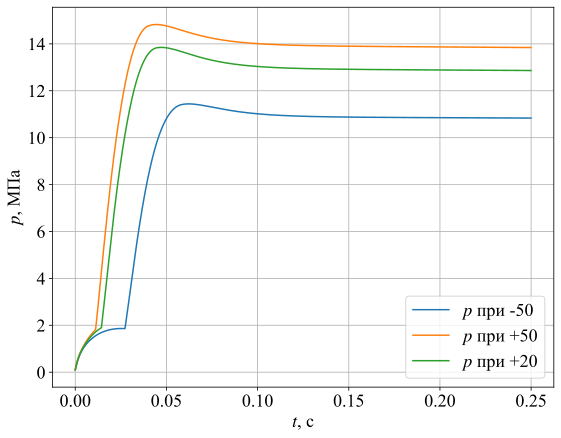

In [75]:
fig = plt.figure(figsize=[9, 7])
%config InlineBackend.figure_format = 'svg'
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size']='18'

plt.plot(result_m50[0,:],result_m50[1,:]/1e6, label = '$p$ при -50')
plt.plot(result_50[0,:],result_50[1,:]/1e6, label = '$p$ при +50')
plt.plot(result_20[0,:],result_20[1,:]/1e6, label = '$p$ при +20')
plt.legend()
plt.xlabel('$t$, с')
plt.ylabel('$p$, МПа')
plt.grid()
plt.show()

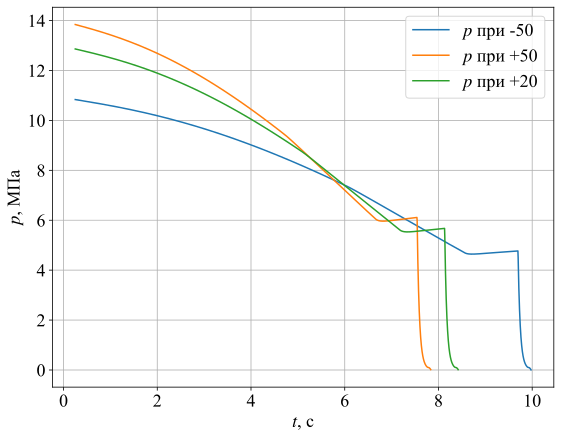

In [76]:
fig = plt.figure(figsize=[9, 7])
%config InlineBackend.figure_format = 'svg'
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size']='18'

plt.plot(result_m50_2[0,:],result_m50_2[1,:]/1e6, label = '$p$ при -50')
plt.plot(result_50_2[0,:],result_50_2[1,:]/1e6, label = '$p$ при +50')
plt.plot(result_20_2[0,:],result_20_2[1,:]/1e6, label = '$p$ при +20')
plt.legend()
plt.xlabel('$t$, с')
plt.ylabel('$p$, МПа')
plt.grid()
plt.show()

In [77]:
print(result)

NameError: name 'result' is not defined